In [34]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [35]:
iris = load_iris()

# Exploring Data

In [36]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Convert datatype to float
df = df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
# append "target" and name it "label"
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df[10:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


# Preparing data for Keras and TensorFlow

In [40]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [41]:
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [42]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [43]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [44]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Sequential model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential([
    Dense(5, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])


model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Adding layer via add() method

model_seq = Sequential()
model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
model_seq.add(Dense(10, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_seq.compile(
    #optimizer='rmsprop',
     optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
history = model_seq.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 1s 12ms/sample - loss: 1.0226 - accuracy: 0.3371 - val_loss: 1.0338 - val_accuracy: 0.3478
Epoch 2/30
89/89 [==============================] - 0s 504us/sample - loss: 1.0116 - accuracy: 0.3371 - val_loss: 1.0238 - val_accuracy: 0.3478
Epoch 3/30
89/89 [==============================] - 0s 591us/sample - loss: 1.0005 - accuracy: 0.3371 - val_loss: 1.0144 - val_accuracy: 0.3478
Epoch 4/30
89/89 [==============================] - 0s 478us/sample - loss: 0.9907 - accuracy: 0.3371 - val_loss: 1.0051 - val_accuracy: 0.3478
Epoch 5/30
89/89 [==============================] - 0s 853us/sample - loss: 0.9807 - accuracy: 0.3371 - val_loss: 0.9958 - val_accuracy: 0.3478
Epoch 6/30
89/89 [==============================] - 0s 496us/sample - loss: 0.9708 - accuracy: 0.3371 - val_loss: 0.9867 - val_accuracy: 0.5652
Epoch 7/30
89/89 [==============================] - 0s 699us/sample - loss: 0.9612 - accuracy

In [64]:
history.history

{'loss': [1.0225591619362993,
  1.011550802863046,
  1.0004708874091675,
  0.9907102323649974,
  0.9806506901644589,
  0.970842859048522,
  0.961198170533341,
  0.9520320838756775,
  0.9425081550405267,
  0.933446460895324,
  0.9239010991675131,
  0.9145311505607004,
  0.9053189185228241,
  0.8958259539657765,
  0.8865792784798011,
  0.8772097946552748,
  0.8681564150231608,
  0.8588786131880256,
  0.8501530303044266,
  0.841493632016557,
  0.8325509964750054,
  0.823834362324704,
  0.8153008068545481,
  0.8067724430159237,
  0.7982394876105062,
  0.7899883610478947,
  0.7817999231681395,
  0.773743602666962,
  0.7655689515424579,
  0.7577158902468306],
 'accuracy': [0.33707866,
  0.33707866,
  0.33707866,
  0.33707866,
  0.33707866,
  0.33707866,
  0.46067417,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.6516854,
  0.651

In [65]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

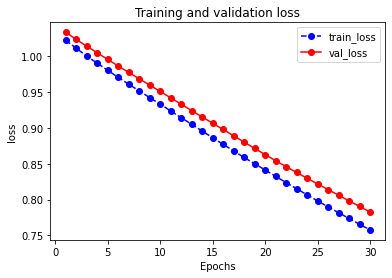

In [66]:
plot_metric(history, 'loss')

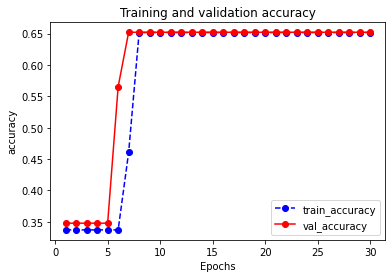

In [67]:
plot_metric(history, 'accuracy')

In [68]:
model_seq.evaluate(x = X_test,y = y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7219879344889992, 0.7105263]